In [1]:
import pandas as pd
import os
import numpy as np
import json
import matplotlib.pyplot as plt

### Preparando tabelas oriundas do Explora (Informações Gerais) 

In [3]:
def _generate_table(basinList, namedEntity):
    '''
    Generates data tables with all brazilian basins.
    Entries: list of basins (list), the type of data to be generated (str)
    Returns the data table
    '''
    namedEntityMap = {'poço': '_Informações_Gerais.xlsx',
                      'litoestratigrafia': '_Litoestratigrafia.xlsx',
                      'cronoestratigrafia': '_Cronoestratigrafia.xlsx',
                      'litologia': '_Litologia_Interpretada.xlsx',
                      'estrutura': '_Estruturas.xlsx',
                      'fluido': '_Fluidos.xlsx'
                     }
    hasFile = False
    fileIndex = -1
    for i in range(len(basinList)):
        if os.path.isfile(basinList[i]+namedEntityMap[namedEntity]):
            hasFile=True
            if fileIndex==-1:
                fileIndex=i
    
    if hasFile:
        df = pd.read_excel(basinList[fileIndex]+namedEntityMap[namedEntity])
        for basin in basinList[fileIndex+1:]:
            if os.path.isfile(basin+namedEntityMap[namedEntity]):
                df = pd.concat([df, pd.read_excel(basin+namedEntityMap[namedEntity])], ignore_index=True)
        return df
    else:
        return 'No file found'

In [5]:
#JACUIPE, 'PANTANAL',
basinList=['ACRE', 'AMAZONAS', 'BARREIRINHAS', 'BRAGANCA-VIZEU', 'CAMAMU-ALMADA', 'CEARA','CUMURUXATIBA', 
           'FOZ_DO_AMAZONAS', 'JATOBA', 'JEQUITINHONHA', 'MARAJO', 'MUCURI_MAR', 'MUCURI_TERRA',
           'PARA-MARANHAO','PARANA', 'PARECIS-ALTO_XINGU', 'PARNAIBA', 'PELOTAS', 'PERNAMBUCO-PARAIBA', 
           'RIO_DO_PEIXE', 'SAO_FRANCISCO', 'SAO_LUIS', 'SOLIMOES', 'TACUTU', 'TUCANO', 'SANTOS','CAMPOS', 
           'POTIGUAR', 'ESPIRITO_SANTO', 'SERGIPE-ALAGOAS', 'RECONCAVO']

In [4]:
df_poco = _generate_table(basinList, 'poço')

In [5]:
df_poco.columns

Index(['Poço', 'Bacia', 'Campo', 'Sigla', 'Prefixo ANP', 'Cadastro ANP',
       'Número do Contrato', 'Status Poço', 'Classificação',
       'Tipo de Reclassificação', 'Finalidade', 'Tipo de Direção',
       'Indicador Direcional', 'Unidade Administrativa', 'Unidade Operativa',
       'Atingiu Alvo', 'Previsão de CO2', 'Ocorrência de CO2',
       'Previsão de H2S', 'Ocorrência de H2S', 'Unidade Litoestratigráfica',
       'Ambiente Base', 'Ambiente Fundo',
       'Data de Inicio Previsto Para Operação do Poço',
       'Data de Término da Perfuração', 'Data de Conclusão do Poço',
       'Profundidade Final Perfilagem (m)', 'Profundidade Final Prevista (m)',
       'Metros Perfurados'],
      dtype='object')

In [6]:
df_poco.drop(columns = ['Número do Contrato', 'Status Poço', 'Finalidade', 'Tipo de Direção',
                        'Indicador Direcional', 'Previsão de CO2', 'Previsão de H2S',
                        'Data de Inicio Previsto Para Operação do Poço', 'Data de Término da Perfuração', 
                        'Data de Conclusão do Poço', 'Profundidade Final Perfilagem (m)', 
                        'Profundidade Final Prevista (m)', 'Metros Perfurados'], inplace=True)

In [7]:
df_poco[df_poco['Prefixo ANP'].isna()]

,Poço,Bacia,Campo,Sigla,Prefixo ANP,Cadastro ANP,Classificação,Tipo de Reclassificação,Unidade Administrativa,Unidade Operativa,Atingiu Alvo,Ocorrência de CO2,Ocorrência de H2S,Unidade Litoestratigráfica,Ambiente Base,Ambiente Fundo
1811,MAPEADO AO NIVEL DO TOPO DA FORMACAO CANDEIAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3365,"POCO 3-BRSA-376-RJS, RECEM PERFURADO, OS",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3366,ARENITOS CRETACEOS ENCONTRADOS APRESENTAM BAIXAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3367,PERMOPOROSIDADES E ESTAO RELACIONADOS A INTERVALO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,ZADA POR FALHAMENTO COM FORTE COMPO-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4007,NENTE DE ESFORCOS TRANSPRESSIVOS. TES-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4008,"TAR, TAMBEM, CALCARIOS FRATURADOS DO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16269,CENICOS DA FM URUCUTUCA PORTADORES DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16459,DOS RESERVATO'RIOS SILICICLA'STICOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16462,DOS RESERVATO'RIOS SILICICLA'STICOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_poco[df_poco['Cadastro ANP']=='S']

,Poço,Bacia,Campo,Sigla,Prefixo ANP,Cadastro ANP,Classificação,Tipo de Reclassificação,Unidade Administrativa,Unidade Operativa,Atingiu Alvo,Ocorrência de CO2,Ocorrência de H2S,Unidade Litoestratigráfica,Ambiente Base,Ambiente Fundo
1906,"DO NI-1.""",VERTICAL,N,NaN,UNIDADE DE NEGOCIOS DE PRODUCAO DA BAHIA,S,NaN,N,1964-03-28 00:00:00,1964-05-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
3368,"DE BAIXA RESPOSTA DE AMPLITUDE SISMICA. """,DIRECIONAL,S,E&P-EXPLORACAO,UNIDADE DE NEGOCIO DE EXPLORACAO E PRODUCAO DA...,S,NaN,N,2005-11-22 00:00:00,2005-12-01 00:00:00,2005-12-22 00:00:00,NaN,NaN,NaN,NaN,NaN
4123,OBJETIVO SECUNDARIO: RESERVATORIOS DO MAASTRIC...,VERTICAL,NaN,EXPLORACAO,UNIDADE DE NEGOCIO DE EXPLORACAO E PRODUCAO DA...,S,NaN,N,2002-05-17 00:00:00,2002-06-01 00:00:00,2002-06-07 00:00:00,NaN,NaN,NaN,NaN,NaN
5540,Ressalta-se que no poco 1-RJS-661 foi detectad...,VERTICAL,N,RESERVATORIOS,UNIDADE DE NEGOCIO DE EXPLORACAO E PRODUCAO DA...,S,N,N,2016-07-24 00:00:00,2016-07-25 00:00:00,2016-07-26 00:00:00,NaN,NaN,NaN,NaN,NaN
16270,"GAS NO 1-BI-3-ES E NO 3-BI-4-ES.""",VERTICAL,N,UNIDADE DE NEGOCIO DE EXPLORACAO E PRODUCAO DO...,UNIDADE DE NEGOCIOS DE PRODUCAO DA BAHIA,S,NaN,NaN,1986-12-09 00:00:00,1986-12-25 00:00:00,1986-12-26 00:00:00,2542,NaN,NaN,NaN,NaN
16463,"UP-DIP. """,VERTICAL,S,E&P-EXPLORACAO,UNIDADE DE NEGOCIO DE EXPLORACAO E PRODUCAO DO...,S,NaN,NaN,2006-09-20 00:00:00,2007-01-26 00:00:00,2007-05-08 00:00:00,5069,NaN,NaN,NaN,NaN
23889,"DAS CAMADAS.""",VERTICAL,S,NaN,UNIDADE DE NEGOCIOS DE PRODUCAO DA BAHIA,S,NaN,N,1976-05-28 00:00:00,1976-07-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
24044,"BARRA E FAZENDA BALSAMO).""",VERTICAL,S,GERENCIA DE E&P BAHIA,UNIDADE DE NEGOCIOS DE PRODUCAO DA BAHIA,S,NaN,NaN,1985-02-04 00:00:00,1985-02-22 00:00:00,NaN,1585,NaN,NaN,NaN,NaN
24511,"3 PELO 1-RI-1-BA.""",VERTICAL,S,SUPERINTENDENCIA EXECUTIVA DE EXPLORACAO E PRO...,UNIDADE DE NEGOCIOS DE PRODUCAO DA BAHIA,S,NaN,NaN,1985-10-01 00:00:00,1985-10-25 00:00:00,NaN,1490,NaN,NaN,NaN,NaN
24562,"RESERVATORIOS.""",VERTICAL,N,NaN,UNIDADE DE NEGOCIOS DE PRODUCAO DA BAHIA,S,N,N,1968-03-28 00:00:00,1968-04-08 00:00:00,1968-04-11 00:00:00,NaN,NaN,NaN,NaN,NaN


In [9]:
#RETIRANDO OCORRÊNCIAS ESPÚRIAS
df_poco.dropna(subset='Prefixo ANP', inplace = True)
df_poco = df_poco[df_poco['Cadastro ANP']!='S']
df_poco = df_poco[df_poco['Prefixo ANP']!='UNIDADE DE NEGOCIOS DE PRODUCAO DA BAHIA']
df_poco = df_poco[df_poco['Sigla']!='UNIDADE DE NEGOCIOS DE PRODUCAO DA BAHIA']
df_poco = df_poco[df_poco['Sigla']!='GERENCIA DE INTERPRETACAO DE AREAS ESTRATEGICAS']
df_poco = df_poco[df_poco['Sigla']!='E&P-EXPLORACAO']

In [10]:
len(df_poco)

30205

In [11]:
df_poco.reset_index(drop=True, inplace=True)

In [12]:
df_poco[df_poco['Prefixo ANP'].duplicated()]

,Poço,Bacia,Campo,Sigla,Prefixo ANP,Cadastro ANP,Classificação,Tipo de Reclassificação,Unidade Administrativa,Unidade Operativa,Atingiu Alvo,Ocorrência de CO2,Ocorrência de H2S,Unidade Litoestratigráfica,Ambiente Base,Ambiente Fundo
6978,1TCPT0001 RN,POTIGUAR TERRA,NaN,1-TCPT-1-RN,1-TCPT-1-RN,NaN,PIONEIRO,NaN,EXPLORACAO,UNIDADE DE NEGOCIOS DE PRODUCAO DO RIO GRANDE ...,NaN,NaN,NaN,Fm. Pendência,TERRA,TERRA
16219,1STAR0023 ES,ESPÍRITO SANTO TERRA,NaN,1-STAR-23-ES,1-STAR-23-ES,NaN,PIONEIRO,NaN,EXPLORACAO,UNIDADE DE NEGOCIO DE EXPLORACAO E PRODUCAO DO...,NaN,NaN,NaN,NaN,TERRA,TERRA
16224,1TUL 0001 ES,ESPÍRITO SANTO TERRA,NaN,1-TUL-1-ES,1-STAR-18-ES,34270025279,PIONEIRO,SECO COM INDICIOS DE OLEO E GAS,UNIDADE DE NEGOCIO DE EXPLORACAO E PRODUCAO DO...,UNIDADE DE NEGOCIOS DE PRODUCAO DA BAHIA,S,NaN,NaN,Embasamento,TERRA,TERRA
16228,1VITA0001 ES,ESPÍRITO SANTO TERRA,NaN,1-VITA-1-ES,1-VITA-1-ES,NaN,PIONEIRO,PRODUTOR SUBCOMERCIAL DE OLEO,UNIDADE DE OPERACOES DE EXPLORACAO E PRODUCAO ...,UNIDADE DE NEGOCIO DE EXPLORACAO E PRODUCAO DO...,NaN,NaN,NaN,Embasamento,TERRA,TERRA
24079,1STAR0027 BA,RECÔNCAVO TERRA,NaN,1-STAR-27-BA,1-STAR-27-BA,NaN,PIONEIRO,NaN,UNIDADE DE NEGOCIOS DE PRODUCAO DA BAHIA,UNIDADE DE NEGOCIOS DE PRODUCAO DA BAHIA,NaN,NaN,NaN,Fm. Pojuca,TERRA,TERRA


In [13]:
df_poco[df_poco['Sigla'].duplicated()]

,Poço,Bacia,Campo,Sigla,Prefixo ANP,Cadastro ANP,Classificação,Tipo de Reclassificação,Unidade Administrativa,Unidade Operativa,Atingiu Alvo,Ocorrência de CO2,Ocorrência de H2S,Unidade Litoestratigráfica,Ambiente Base,Ambiente Fundo
16228,1VITA0001 ES,ESPÍRITO SANTO TERRA,NaN,1-VITA-1-ES,1-VITA-1-ES,NaN,PIONEIRO,PRODUTOR SUBCOMERCIAL DE OLEO,UNIDADE DE OPERACOES DE EXPLORACAO E PRODUCAO ...,UNIDADE DE NEGOCIO DE EXPLORACAO E PRODUCAO DO...,NaN,NaN,NaN,Embasamento,TERRA,TERRA


### Preparando tabela de poços DMRR

In [14]:
df = pd.read_excel('../poco/wellData.xlsx')

In [15]:
df.columns

Index(['DMPO_CD_CBI_UNID_OPER', 'DMPO_CD_POCO', 'DMPO_DT_CNCL_POCO',
       'DMPO_DT_INIC_PRFU', 'DMPO_DT_INIC_PRFU_SIDE', 'DMPO_DT_TERM_PRFU',
       'DMPO_DT_TERM_PRFU_SIDE', 'DMPO_IN_LOCC_POCO', 'DMPO_IN_POCO_DIRN',
       'DMPO_IN_POCO_PRDD', 'DMPO_MD_DIST_COST', 'DMPO_MD_LAMI_DAGU',
       'DMPO_MD_LATI_BASE', 'DMPO_MD_LATI_FUND', 'DMPO_MD_LONG_BASE',
       'DMPO_MD_LONG_FUND', 'DMPO_MD_MERD_CETR', 'DMPO_MD_METR_PRFU',
       'DMPO_MD_PROF_FIM_PERF', 'DMPO_MD_PROF_FINAL_SNDDOR',
       'DMPO_MD_PROF_PREV', 'DMPO_MD_UTM_LEST_BASE', 'DMPO_MD_UTM_LEST_FUND',
       'DMPO_MD_UTM_LEST_PREV_BASE', 'DMPO_MD_UTM_LEST_PREV_FUND',
       'DMPO_MD_UTM_NORT_BASE', 'DMPO_MD_UTM_NORT_FUND',
       'DMPO_MD_UTM_NORT_PREV_BASE', 'DMPO_MD_UTM_NORT_PREV_FUND',
       'DMPO_NM_ABRE_CAMP', 'DMPO_NM_ABRE_EMPR', 'DMPO_NM_ABRE_PAIS',
       'DMPO_NM_AMBI_BASE', 'DMPO_NM_AMBI_FUND', 'DMPO_NM_BACI',
       'DMPO_NM_CAMP', 'DMPO_NM_CLSS_POCO', 'DMPO_NM_CMPT',
       'DMPO_NM_CMPT_POCO', 'DMPO_NM_CNDC', 'D

In [16]:
df.drop(columns=['DMPO_CD_CBI_UNID_OPER', 'DMPO_DT_CNCL_POCO', 'DMPO_DT_INIC_PRFU', 'DMPO_DT_INIC_PRFU_SIDE', 
                 'DMPO_DT_TERM_PRFU', 'DMPO_DT_TERM_PRFU_SIDE', 'DMPO_IN_LOCC_POCO', 'DMPO_IN_POCO_DIRN', 
                 'DMPO_IN_POCO_PRDD', 'DMPO_MD_DIST_COST', 'DMPO_MD_LAMI_DAGU', 'DMPO_MD_LATI_BASE', 
                 'DMPO_MD_LATI_FUND', 'DMPO_MD_LONG_BASE', 'DMPO_MD_LONG_FUND', 'DMPO_MD_MERD_CETR', 
                 'DMPO_MD_METR_PRFU', 'DMPO_MD_PROF_FIM_PERF', 'DMPO_MD_PROF_FINAL_SNDDOR', 'DMPO_MD_PROF_PREV', 
                 'DMPO_MD_UTM_LEST_BASE', 'DMPO_MD_UTM_LEST_FUND', 'DMPO_MD_UTM_LEST_PREV_BASE', 
                 'DMPO_MD_UTM_LEST_PREV_FUND', 'DMPO_MD_UTM_NORT_BASE', 'DMPO_MD_UTM_NORT_FUND', 
                 'DMPO_MD_UTM_NORT_PREV_BASE', 'DMPO_MD_UTM_NORT_PREV_FUND', 'DMPO_NM_ABRE_EMPR', 
                 'DMPO_NM_ABRE_PAIS', 'DMPO_NM_AMBI_BASE', 'DMPO_NM_CAMP', 'DMPO_NM_CMPT', 'DMPO_NM_DATM_GEOD', 
                 'DMPO_NM_DIRC_POCO', 'DMPO_NM_LOCL', 'DMPO_NM_MUNI', 'DMPO_NM_ORIG_DADO_ADQU_POCO', 
                 'DMPO_NM_STAT_POCO', 'DMPO_NR_POCO', 'DMPO_SG_API', 'DMPO_SG_LOCC_POCO', 'DMPO_SG_REFE_NOMN_POCO', 
                 'DMPO_SG_UNID_ADMI', 'DMPO_SG_UNID_FEDE', 'DMPO_SG_UNID_OPER_RESP'], inplace=True)

In [17]:
len(df)

30922

In [18]:
df.dropna(subset='DMPO_NM_CMPT_POCO', inplace=True)

In [19]:
len(df)

30806

In [20]:
indexes = []
duplicated_wells = list(df[df['DMPO_NM_CMPT_POCO'].duplicated()]['DMPO_NM_CMPT_POCO'])

In [21]:
for i, row in df.iterrows():
    if row['DMPO_NM_CMPT_POCO'] in duplicated_wells:
        if not isinstance(row['DMPO_SG_PRFX_POCO_ANP'], str):
            indexes.append(i)

In [22]:
df.drop(indexes, inplace=True)

In [23]:
len(df)

30762

In [24]:
df.reset_index(drop=True, inplace=True)

In [25]:
df[df['DMPO_NM_CMPT_POCO'].duplicated()]

,DMPO_CD_POCO,DMPO_NM_ABRE_CAMP,DMPO_NM_AMBI_FUND,DMPO_NM_BACI,DMPO_NM_CLSS_POCO,DMPO_NM_CMPT_POCO,DMPO_NM_CNDC,DMPO_NM_FAIX_LAMI_DAGU,DMPO_NM_RCLS_POCO,DMPO_NM_TIPO_UNID_LIES,DMPO_NM_UNID_LIES,DMPO_SG_PREF_POCO_DEPEX,DMPO_SG_PRFX_BOCA_POCO,DMPO_SG_PRFX_POCO,DMPO_SG_PRFX_POCO_ANP,DMPO_SG_UNID_OPER
29059,29229,LULA,MAR,SANTOS,INJECAO,8-LL-74-RJS,NÃO ATRIBUÍDO,ÁGUA ULTRAPROFUNDA,NÃO ATRIBUÍDO,NaN,NaN,8LL 0074 RJS,8-LL-74-RJS,8-LL-74-RJS,8-LL-74-RJS,UO-BS
30571,29935,NÃO ATRIBUÍDO,TERRA,RECÔNCAVO TERRA,PIONEIRO,1-ALV-3D-BA,NÃO ATRIBUÍDO,NaN,NÃO ATRIBUÍDO,FORMACAO,EMBASAMENTO,1ALV 0003D BA,1-ALV-3D-BA,1-ALV-3D-BA,1-ALV-3D-BA,UO-BA


#### Gerar código do poço a partir da Sigla (na tabela do Explora) e do Nome do Poço (DMPO_NM_CMPT_POCO) na tabela da DMRR

In [26]:
def _codigo_poco(x, df):
    if x in list(df['DMPO_NM_CMPT_POCO']):
        return 'POCO_CD_POCO_'+str(list(df[df['DMPO_NM_CMPT_POCO']==x]['DMPO_CD_POCO'])[0]).zfill(6)
    else:
        print(x)
        return 'POCO_GENERICO'

In [27]:
df_poco['POCO_CD_POCO']=df_poco['Sigla'].apply(lambda x: _codigo_poco(x, df))

In [28]:
df_poco[df_poco['POCO_CD_POCO']=='POCO_GENERICO']

,Poço,Bacia,Campo,Sigla,Prefixo ANP,Cadastro ANP,Classificação,Tipo de Reclassificação,Unidade Administrativa,Unidade Operativa,Atingiu Alvo,Ocorrência de CO2,Ocorrência de H2S,Unidade Litoestratigráfica,Ambiente Base,Ambiente Fundo,POCO_CD_POCO


### Gerar relações de localização poço -> bacia e poço -> campo

In [29]:
with open('../bacia/bacias.json', 'r') as f:
    codigos_bacias = json.load(f)

In [30]:
def _codigo_bacia(x, codigos_bacias):
    for key, name in codigos_bacias.items():
        if x in name:
            return 'BASE_CD_BACIA_'+(str(key).zfill(3))

In [31]:
df_poco['BASE_CD_BACIA'] = df_poco['Bacia'].apply(lambda x: _codigo_bacia(x, codigos_bacias))

In [32]:
with open('../campo/campos.json', 'r') as f:
    codigos_campos = json.load(f)

In [33]:
def _codigo_campo(x, codigos_campos):
    if isinstance(x, str):
        for key, name in codigos_campos.items():
            if x in name:
                return 'CAMP_CD_CAMPO_'+(str(key).zfill(4))

In [34]:
df_poco['CAMP_CD_CAMPO'] = df_poco['Campo'].apply(lambda x: _codigo_campo(x, codigos_campos))

In [35]:
df_poco['Campo'].nunique()

466

In [36]:
df_poco['CAMP_CD_CAMPO'].nunique()

462

In [37]:
df_poco['POCO_CD_POCO'].nunique()

30204

In [38]:
df_poco[df_poco['POCO_CD_POCO'].duplicated()]

,Poço,Bacia,Campo,Sigla,Prefixo ANP,Cadastro ANP,Classificação,Tipo de Reclassificação,Unidade Administrativa,Unidade Operativa,Atingiu Alvo,Ocorrência de CO2,Ocorrência de H2S,Unidade Litoestratigráfica,Ambiente Base,Ambiente Fundo,POCO_CD_POCO,BASE_CD_BACIA,CAMP_CD_CAMPO
16228,1VITA0001 ES,ESPÍRITO SANTO TERRA,NaN,1-VITA-1-ES,1-VITA-1-ES,NaN,PIONEIRO,PRODUTOR SUBCOMERCIAL DE OLEO,UNIDADE DE OPERACOES DE EXPLORACAO E PRODUCAO ...,UNIDADE DE NEGOCIO DE EXPLORACAO E PRODUCAO DO...,NaN,NaN,NaN,Embasamento,TERRA,TERRA,POCO_CD_POCO_029876,BASE_CD_BACIA_270,None


In [39]:
#SALVAR A TABELA POÇO
df_poco.to_excel('pocos_bacia_campo_explora.xlsx')

### Gerar relações poço -> unidade litoestratigráfica

In [40]:
df_lito = _generate_table(basinList, 'litoestratigrafia')

In [41]:
len(df_lito)

192581

In [42]:
df_lito.columns

Index(['Poço', 'Bacia', 'Campo', 'Unidade', 'Vigente',
       'Qualificador da Interpretação', 'Topo', 'Qualificação Topo', 'Base',
       'Qualificação Base', 'Tipo Unidade', 'Data Interpretação'],
      dtype='object')

In [43]:
df_lito.head()

,Poço,Bacia,Campo,Unidade,Vigente,Qualificador da Interpretação,Topo,Qualificação Topo,Base,Qualificação Base,Tipo Unidade,Data Interpretação
0,1BT 0001 AM,ACRE,NaN,Gr. Javari,Sim,BOM,7.4,DISCORDANTE,1255.0,NaN,Grupo,1994-10-24 00:00:00
1,1BT 0001 AM,ACRE,NaN,Fm. Solimões,Sim,BOM,7.4,DISCORDANTE,1255.0,NaN,Formação,1994-10-24 00:00:00
2,1BT 0001 AM,ACRE,NaN,GR. JAQUIRANA INDIVISO,Não,BOM,1255.0,NaN,1463.0,NaN,Formação,1994-10-24 00:00:00
3,1BT 0001 AM,ACRE,NaN,Gr. Jaquirana,Sim,BOM,1255.0,NaN,2505.0,NaN,Grupo,1994-10-24 00:00:00
4,1BT 0001 AM,ACRE,NaN,Fm. Ramon,Sim,BOM,1463.0,NaN,2505.0,NaN,Formação,1994-10-24 00:00:00


In [44]:
df_poco.head()

,Poço,Bacia,Campo,Sigla,Prefixo ANP,Cadastro ANP,Classificação,Tipo de Reclassificação,Unidade Administrativa,Unidade Operativa,Atingiu Alvo,Ocorrência de CO2,Ocorrência de H2S,Unidade Litoestratigráfica,Ambiente Base,Ambiente Fundo,POCO_CD_POCO,BASE_CD_BACIA,CAMP_CD_CAMPO
0,1BT 0001 AM,ACRE,NaN,1-BT-1-AM,1-BT-1-AM,140100031100.0,PIONEIRO,SECO SEM INDICIOS DE PETROLEO,NaN,UNIDADE DE NEGOCIOS DE PRODUCAO DA AMAZONIA,NaN,NaN,NaN,Fm. Juruá Mirim,TERRA,TERRA,POCO_CD_POCO_022595,BASE_CD_BACIA_010,None
1,1BT 0002 AM,ACRE,NaN,1-BT-2-AM,1-BT-2-AM,140100031800.0,PIONEIRO,SECO SEM INDICIOS DE PETROLEO,NaN,UNIDADE DE NEGOCIOS DE PRODUCAO DA AMAZONIA,NaN,NaN,NaN,Fm. Juruá Mirim,TERRA,TERRA,POCO_CD_POCO_022593,BASE_CD_BACIA_010,None
2,1JQ 0001 AM,ACRE,NaN,1-JQ-1-AM,1-JQ-1-AM,140100030300.0,PIONEIRO,SECO SEM INDICIOS DE PETROLEO,NaN,UNIDADE DE NEGOCIOS DE PRODUCAO DA AMAZONIA,NaN,NaN,NaN,Embasamento,TERRA,TERRA,POCO_CD_POCO_022601,BASE_CD_BACIA_010,None
3,1RM 0001 AC,ACRE,NaN,1-RM-1-AC,1-RM-1-AC,40100047000.0,PIONEIRO,SECO SEM INDICIOS DE PETROLEO,NaN,UNIDADE DE NEGOCIOS DE PRODUCAO DA AMAZONIA,NaN,NaN,NaN,Embasamento,TERRA,TERRA,POCO_CD_POCO_022640,BASE_CD_BACIA_010,None
4,1RPX 0001 AM,ACRE,NaN,1-RPX-1-AM,1-RPX-1-AM,140100068500.0,PIONEIRO,SECO SEM INDICIOS DE PETROLEO,NaN,UNIDADE DE NEGOCIOS DE PRODUCAO DA AMAZONIA,NaN,NaN,NaN,Embasamento,TERRA,TERRA,POCO_CD_POCO_022591,BASE_CD_BACIA_010,None


In [45]:
df_lito.drop(columns=['Qualificador da Interpretação', 'Qualificação Topo', 'Qualificação Base', 'Data Interpretação'],
             inplace=True
            )

In [46]:
df_lito[df_lito['Unidade'].isna()]

,Poço,Bacia,Campo,Unidade,Vigente,Topo,Base,Tipo Unidade


In [47]:
df_lito[df_lito['Poço'].isna()]

,Poço,Bacia,Campo,Unidade,Vigente,Topo,Base,Tipo Unidade


In [48]:
df_litoestratigrafia = pd.merge(df_poco[['Poço', 'Bacia', 'Campo', 'Sigla',
                                         'POCO_CD_POCO', 'BASE_CD_BACIA', 'CAMP_CD_CAMPO']], df_lito, how='outer')

In [49]:
df_litoestratigrafia.dropna(subset='Unidade', inplace = True)

In [50]:
len(df_litoestratigrafia)

192586

In [51]:
df_litoestratigrafia.reset_index(drop=True, inplace=True)

In [52]:
with open('../litoestratigrafia/unidades_litoestratigraficas.json', 'r') as f:
    codigos_litoestratigrafia = json.load(f)
    codigos_litoestratigrafia['member']['SD_000']=['Embasamento']

In [53]:
def _codigo_litoestratigrafia(x, codigos_litoestratigrafia):
    for tipo_litoestratigrafia in codigos_litoestratigrafia.keys():
        for key, name in codigos_litoestratigrafia[tipo_litoestratigrafia].items():
            if x in name:
                return key

In [54]:
df_litoestratigrafia['LITHOSTRATIGRAPHIC_UNIT']=df_litoestratigrafia['Unidade'].apply(lambda x: _codigo_litoestratigrafia(x, codigos_litoestratigrafia))

In [55]:
df_litoestratigrafia[df_litoestratigrafia['Base'].isna()]

,Poço,Bacia,Campo,Sigla,POCO_CD_POCO,BASE_CD_BACIA,CAMP_CD_CAMPO,Unidade,Vigente,Topo,Base,Tipo Unidade,LITHOSTRATIGRAPHIC_UNIT
5,1BT 0001 AM,ACRE,NaN,1-BT-1-AM,POCO_CD_POCO_022595,BASE_CD_BACIA_010,None,Fm. Juruá Mirim,Sim,2505.0,NaN,Formação,formacao_218
11,1BT 0002 AM,ACRE,NaN,1-BT-2-AM,POCO_CD_POCO_022593,BASE_CD_BACIA_010,None,Fm. Juruá Mirim,Sim,2341.0,NaN,Formação,formacao_218
19,1JQ 0001 AM,ACRE,NaN,1-JQ-1-AM,POCO_CD_POCO_022601,BASE_CD_BACIA_010,None,Embasamento,Sim,3126.0,NaN,Sem Definição,SD_000
30,1RM 0001 AC,ACRE,NaN,1-RM-1-AC,POCO_CD_POCO_022640,BASE_CD_BACIA_010,None,Embasamento,Sim,4226.0,NaN,Sem Definição,SD_000
34,1RPX 0001 AM,ACRE,NaN,1-RPX-1-AM,POCO_CD_POCO_022591,BASE_CD_BACIA_010,None,Gr. Jaquirana,Sim,1720.0,NaN,Grupo,grupo_065
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192571,9TQAG0002 BA,RECÔNCAVO TERRA,TAQUIPE,9-TQAG-2-BA,POCO_CD_POCO_003825,BASE_CD_BACIA_240,CAMP_CD_CAMPO_0958,Gr. Massacará,Sim,2.0,NaN,Grupo,grupo_024
192572,9TQAG0003 BA,RECÔNCAVO TERRA,TAQUIPE,9-TQAG-3-BA,POCO_CD_POCO_003603,BASE_CD_BACIA_240,CAMP_CD_CAMPO_0958,Fm. São Sebastião,Sim,2.0,NaN,Formação,formacao_149
192573,9TQAG0003 BA,RECÔNCAVO TERRA,TAQUIPE,9-TQAG-3-BA,POCO_CD_POCO_003603,BASE_CD_BACIA_240,CAMP_CD_CAMPO_0958,Gr. Massacará,Sim,2.0,NaN,Grupo,grupo_024
192578,9TQ 0108A BA,RECÔNCAVO TERRA,TAQUIPE,9-TQ-108A-BA,POCO_CD_POCO_003606,BASE_CD_BACIA_240,CAMP_CD_CAMPO_0958,Gr. Massacará,Sim,2.7,NaN,Grupo,grupo_024


### Gerar relações unidade litoestratigráfica -> unidade cronoestratigráfica

In [6]:
df_cronoestratigrafia = _generate_table(basinList, 'cronoestratigrafia')

In [8]:
df_cronoestratigrafia['Unidade'].unique()

array([' Moscoviano', ' Mioceno', ' Paleogeno', ' Maastrichtiano',
       ' Santoniano', ' Turoniano', ' Cenomaniano', ' Albiano',
       ' Eoceno Superior'], dtype=object)

In [57]:
len(df_cronoestratigrafia)

33953

In [58]:
df_cronoestratigrafia['Qualidade Interpretação'].unique()

array(['DADO NAO REVISTO', 'BOM', 'QUESTIONAVEL', 'INFERIDO', 'REGULAR',
       'DATACAO EXATA OU MAIS JOVEM', 'DATACAO EXATA OU MAIS ANTIGA'],
      dtype=object)

In [59]:
len(df_cronoestratigrafia[(df_cronoestratigrafia['Qualidade Interpretação']=='BOM')|
                          (df_cronoestratigrafia['Qualidade Interpretação']=='REGULAR')])/len(df_cronoestratigrafia)

0.8181309457190823

In [60]:
len(df_cronoestratigrafia[(df_cronoestratigrafia['Qualidade Interpretação']=='DATACAO EXATA OU MAIS JOVEM')|
                          (df_cronoestratigrafia['Qualidade Interpretação']=='DATACAO MAIS JOVEM OU MAIS ANTIGA')])/len(df_cronoestratigrafia)

0.0007068594822254293

In [61]:
df_cronoestratigrafia.drop(columns=['Qualificação Topo', 'Qualificação Base', 
                       'Data de Arquivamento', 'Qualidade Interpretação', 'Comentário'], inplace=True)

In [62]:
df_cronoestratigrafia[df_cronoestratigrafia['Unidade'].isna()]

,Poço,Bacia,Campo,Unidade,Topo,Base


In [63]:
df_cronoestratigrafia[df_cronoestratigrafia['Poço'].isna()]

,Poço,Bacia,Campo,Unidade,Topo,Base


In [64]:
df_cronoestratigrafia.head()

,Poço,Bacia,Campo,Unidade,Topo,Base
0,1BT 0001 AM,ACRE,NaN,Moscoviano,855.0,3731.0
1,1JQ 0001 AM,ACRE,NaN,Mioceno,1635.0,2040.0
2,1JQ 0001 AM,ACRE,NaN,Paleogeno,2040.0,2260.0
3,1JQ 0001 AM,ACRE,NaN,Maastrichtiano,2260.0,2500.0
4,1JQ 0001 AM,ACRE,NaN,Santoniano,2500.0,2760.0


In [65]:
df_cronoestratigrafia.dropna(subset='Unidade', inplace=True)

In [66]:
len(df_cronoestratigrafia)

33953

In [67]:
df_cronoestratigrafia.tail()

,Poço,Bacia,Campo,Unidade,Topo,Base
33948,7TQ 0154 BA,RECÔNCAVO TERRA,TAQUIPE,Aratu,750.0,1101.0
33949,7TQ 0156 BA,RECÔNCAVO TERRA,TAQUIPE,Aratu,738.0,1138.0
33950,7TQ 0168 BA,RECÔNCAVO TERRA,TAQUIPE,Aratu,699.0,1041.0
33951,7TQ 0172 BA,RECÔNCAVO TERRA,TAQUIPE,Aratu,753.0,1041.0
33952,8BAIA0006 BA,RECÔNCAVO TERRA,BURACICA,Rio da Serra,396.0,771.0


In [68]:
df_cronoestratigrafia['Unidade'].unique()

array(['Moscoviano', 'Mioceno', 'Paleogeno', 'Maastrichtiano',
       'Santoniano', 'Turoniano', 'Cenomaniano', 'Albiano',
       'Eoceno Superior', 'Permiano', 'Bashkiriano', 'Sakmariano',
       'Viseano', 'Tournaisiano', 'Famenniano', 'Famenniano Superior',
       'Frasniano', 'Givetiano', 'Eifeliano', 'Devoniano Inferior',
       'Pragiano', 'Lochkoviano', 'Siluriano', 'Ordoviciano Superior',
       'Emsiano', 'Kasimoviano', 'Gzheliano', 'Devoniano Superior',
       'Devoniano Médio', 'Campaniano', 'Carbonífero', 'Mississippiano',
       'Serpukhoviano', 'Pennsylvaniano', 'Cretáceo', 'Alagoas',
       'Eoceno Inferior', 'Cretáceo Superior', 'Eoceno', 'Paleoceno',
       'Llandovery', 'Cenomaniano Inferior', 'Devoniano',
       'Mississippiano Superior', 'Quaternário', 'Cenozoico',
       'Cenomaniano Superior', 'Cenomaniano Médio', 'Albiano Superior',
       'Oligoceno', 'Aptiano Superior', 'Cretáceo Inferior',
       'Albiano Médio', 'Albiano Inferior', 'Mioceno Inferior',
       

In [69]:
with open('../cronoestratigrafia/unidades_cronoestratigraficas.json', 'r') as f:
    codigos_cronoestratigrafia = json.load(f)

In [70]:
df_poco[df_poco['BASE_CD_BACIA'].isna()]

,Poço,Bacia,Campo,Sigla,Prefixo ANP,Cadastro ANP,Classificação,Tipo de Reclassificação,Unidade Administrativa,Unidade Operativa,Atingiu Alvo,Ocorrência de CO2,Ocorrência de H2S,Unidade Litoestratigráfica,Ambiente Base,Ambiente Fundo,POCO_CD_POCO,BASE_CD_BACIA,CAMP_CD_CAMPO


In [71]:
def _codigo_cronoestratigrafia(x, codigos_cronoestratigrafia):
    for tipo_cronoestratigrafia in codigos_cronoestratigrafia.keys():
        for key, name in codigos_cronoestratigrafia[tipo_cronoestratigrafia].items():
            if x in name:
                return(key)

In [72]:
df_cronoestratigrafia['GEOLOGICAL_TIME_INTERVAL']=df_cronoestratigrafia['Unidade'].apply(lambda x: _codigo_cronoestratigrafia(x, codigos_cronoestratigrafia))

In [73]:
df_cronoestratigrafia.head()

,Poço,Bacia,Campo,Unidade,Topo,Base,GEOLOGICAL_TIME_INTERVAL
0,1BT 0001 AM,ACRE,NaN,Moscoviano,855.0,3731.0,Moscovian
1,1JQ 0001 AM,ACRE,NaN,Mioceno,1635.0,2040.0,Miocene
2,1JQ 0001 AM,ACRE,NaN,Paleogeno,2040.0,2260.0,Paleogene
3,1JQ 0001 AM,ACRE,NaN,Maastrichtiano,2260.0,2500.0,Maastrichtian
4,1JQ 0001 AM,ACRE,NaN,Santoniano,2500.0,2760.0,Santonian


In [74]:
df_litoestratigrafia[df_litoestratigrafia['Topo'].isna()]

,Poço,Bacia,Campo,Sigla,POCO_CD_POCO,BASE_CD_BACIA,CAMP_CD_CAMPO,Unidade,Vigente,Topo,Base,Tipo Unidade,LITHOSTRATIGRAPHIC_UNIT


In [75]:
len(df_litoestratigrafia[df_litoestratigrafia['Base'].isna()])/len(df_litoestratigrafia)

0.17892785560736502

In [76]:
len(df_litoestratigrafia[df_litoestratigrafia['Topo'].isna()])/len(df_litoestratigrafia)

0.0

In [77]:
len(df_cronoestratigrafia[df_cronoestratigrafia['Base'].isna()])/len(df_cronoestratigrafia)

0.0

In [78]:
len(df_cronoestratigrafia[df_cronoestratigrafia['Topo'].isna()])/len(df_cronoestratigrafia)

0.0

In [79]:
def _codigo_qualidade_cronoestratigrafica(x, topo, base, df_cronoestratigrafia):
    if base==np.nan:
        return np.nan
    else:
        topoLito = float(topo)
        baseLito = float(base)
        
        #lari lará rever os nomes
        df_litocrono = df_cronoestratigrafia[df_cronoestratigrafia['Poço']==x]
        for j in list(df_litocrono.index):
            topoCrono = float(df_litocrono.loc[j]['Topo'])
            baseCrono = float(df_litocrono.loc[j]['Base'])
            
            if ((topoCrono < topoLito)&(baseCrono > baseLito)):
                return df_litocrono.loc[j]['GEOLOGICAL_TIME_INTERVAL']+'_quality'
            
            elif (((topoLito >= topoCrono)&(topoLito <= baseCrono))|
                ((baseLito >= topoCrono)&(baseLito <= baseCrono))):
                return df_litocrono.loc[j]['GEOLOGICAL_TIME_INTERVAL']+'_quality'
            
            elif ((topoLito < topoCrono)&(baseLito > baseCrono)):
                return df_litocrono.loc[j]['GEOLOGICAL_TIME_INTERVAL']+'_quality'
            

In [80]:
df_litoestratigrafia.dropna(subset='LITHOSTRATIGRAPHIC_UNIT', inplace=True)

In [81]:
len(df_litoestratigrafia)

175364

In [82]:
df_litoestratigrafia.reset_index(drop=True, inplace=True)

In [83]:
df_litoestratigrafia['GEOLOGICAL_AGE']=df_litoestratigrafia.apply(lambda x: _codigo_qualidade_cronoestratigrafica(x['Poço'], x['Topo'], x['Base'], df_cronoestratigrafia), axis=1)

In [84]:
df_litoestratigrafia.head()

,Poço,Bacia,Campo,Sigla,POCO_CD_POCO,BASE_CD_BACIA,CAMP_CD_CAMPO,Unidade,Vigente,Topo,Base,Tipo Unidade,LITHOSTRATIGRAPHIC_UNIT,GEOLOGICAL_AGE
0,1BT 0001 AM,ACRE,NaN,1-BT-1-AM,POCO_CD_POCO_022595,BASE_CD_BACIA_010,None,Gr. Javari,Sim,7.4,1255.0,Grupo,grupo_002,Moscovian_quality
1,1BT 0001 AM,ACRE,NaN,1-BT-1-AM,POCO_CD_POCO_022595,BASE_CD_BACIA_010,None,Fm. Solimões,Sim,7.4,1255.0,Formação,formacao_329,Moscovian_quality
2,1BT 0001 AM,ACRE,NaN,1-BT-1-AM,POCO_CD_POCO_022595,BASE_CD_BACIA_010,None,Gr. Jaquirana,Sim,1255.0,2505.0,Grupo,grupo_065,Moscovian_quality
3,1BT 0001 AM,ACRE,NaN,1-BT-1-AM,POCO_CD_POCO_022595,BASE_CD_BACIA_010,None,Fm. Ramon,Sim,1463.0,2505.0,Formação,formacao_238,Moscovian_quality
4,1BT 0001 AM,ACRE,NaN,1-BT-1-AM,POCO_CD_POCO_022595,BASE_CD_BACIA_010,None,Fm. Juruá Mirim,Sim,2505.0,NaN,Formação,formacao_218,Moscovian_quality


In [85]:
df_litoestratigrafia[df_litoestratigrafia['GEOLOGICAL_AGE'].isna()]

,Poço,Bacia,Campo,Sigla,POCO_CD_POCO,BASE_CD_BACIA,CAMP_CD_CAMPO,Unidade,Vigente,Topo,Base,Tipo Unidade,LITHOSTRATIGRAPHIC_UNIT,GEOLOGICAL_AGE
5,1BT 0002 AM,ACRE,NaN,1-BT-2-AM,POCO_CD_POCO_022593,BASE_CD_BACIA_010,None,Gr. Javari,Sim,6.7,1150.0,Grupo,grupo_002,None
6,1BT 0002 AM,ACRE,NaN,1-BT-2-AM,POCO_CD_POCO_022593,BASE_CD_BACIA_010,None,Fm. Solimões,Sim,6.7,1150.0,Formação,formacao_329,None
7,1BT 0002 AM,ACRE,NaN,1-BT-2-AM,POCO_CD_POCO_022593,BASE_CD_BACIA_010,None,Gr. Jaquirana,Sim,1150.0,2341.0,Grupo,grupo_065,None
8,1BT 0002 AM,ACRE,NaN,1-BT-2-AM,POCO_CD_POCO_022593,BASE_CD_BACIA_010,None,Fm. Ramon,Sim,1378.0,2341.0,Formação,formacao_238,None
9,1BT 0002 AM,ACRE,NaN,1-BT-2-AM,POCO_CD_POCO_022593,BASE_CD_BACIA_010,None,Fm. Juruá Mirim,Sim,2341.0,NaN,Formação,formacao_218,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175359,9TQ 0191 BA,RECÔNCAVO TERRA,TAQUIPE,9-TQ-191-BA,POCO_CD_POCO_006179,BASE_CD_BACIA_240,CAMP_CD_CAMPO_0958,Gr. Massacará,Sim,0.0,122.0,Grupo,grupo_024,None
175360,9TQ 0192 BA,RECÔNCAVO TERRA,TAQUIPE,9-TQ-192-BA,POCO_CD_POCO_006184,BASE_CD_BACIA_240,CAMP_CD_CAMPO_0958,Fm. São Sebastião,Sim,0.0,120.0,Formação,formacao_149,None
175361,9TQ 0192 BA,RECÔNCAVO TERRA,TAQUIPE,9-TQ-192-BA,POCO_CD_POCO_006184,BASE_CD_BACIA_240,CAMP_CD_CAMPO_0958,Gr. Massacará,Sim,0.0,120.0,Grupo,grupo_024,None
175362,9TQ 0193 BA,RECÔNCAVO TERRA,TAQUIPE,9-TQ-193-BA,POCO_CD_POCO_006229,BASE_CD_BACIA_240,CAMP_CD_CAMPO_0958,Fm. São Sebastião,Sim,0.0,250.0,Formação,formacao_149,None


In [86]:
df_litoestratigrafia.to_excel('litoestratigrafia_cronoestratigrafia_explora.xlsx')

### Gerar relações fluidos -> unidade litoestratigráfica

In [87]:
df_fluido = _generate_table(basinList, 'fluido')

In [88]:
len(df_fluido)

5201

In [89]:
df_fluido.head()

,Poço,Bacia,Campo,Fluido,Topo (m),Base (m),Garrafa,Certificado,Tipo,Revest. H2S,...,Contam. fluido de reserv. (%mol),MM do últ. componente,Densid. do últ. componente,Densid. do gás flash,Teor de mercaptans (ppmv),Temp. do ensaio (ºC),Tempo entre coleta e análise (dias),Data de emissão,Observações,Data da últ. atualização
0,1JAN 0001 AM,AMAZONAS,NaN,GAS,1738.7,NaN,PT-15K-070,623/2015,Limpo,Não,...,NaN,143.90,0.76,0.73,0.2,24.5,13.0,2015-07-09,NaN,2015-08-31
1,1JAN 0001 AM,AMAZONAS,NaN,GAS,1743.4,NaN,PT-15K-031,624/2015,Limpo,Não,...,NaN,142.51,0.76,0.72,0.2,24.0,13.0,2015-07-09,NaN,2015-08-31
2,1JAN 0001 AM,AMAZONAS,NaN,GAS,1851.0,NaN,PT-15K-069,625/2015,Limpo,Não,...,NaN,138.41,0.75,0.77,0.2,22.1,31.0,2015-07-09,NaN,2015-08-31
3,1JAN 0001 AM,AMAZONAS,NaN,GAS,1851.0,NaN,PT-15K-074,626/2015,Limpo,Não,...,NaN,141.54,0.75,0.77,0.2,22.7,32.0,2015-07-09,NaN,2015-08-31
4,1CES 0158 CE,CEARÁ,NaN,OLEO,3704.2,NaN,32586-IB,465/2012,Descontaminado,Sim,...,7.58,420.00,0.89,0.74,0.2,40.0,11.0,2012-08-21,NaN,2012-09-05


In [90]:
len(df_fluido[df_fluido['Base (m)'].isna()])/len(df_fluido)

0.9248221495866179

In [91]:
len(df_fluido[df_fluido['Contam. fluido de reserv. (%mol)'].isna()])/len(df_fluido)

0.14035762353393577

In [92]:
df_fluido.columns

Index(['Poço', 'Bacia', 'Campo', 'Fluido', 'Topo (m)', 'Base (m)', 'Garrafa',
       'Certificado', 'Tipo', 'Revest. H2S', 'Teor de H2S (ppmv)', 'RGO',
       'ºAPI', 'Contam. óleo morto (%m/m)', 'Contam. óleo morto (%mol)',
       'Contam. fluido de reserv. (%m/m)', 'Contam. fluido de reserv. (%mol)',
       'MM do últ. componente', 'Densid. do últ. componente',
       'Densid. do gás flash', 'Teor de mercaptans (ppmv)',
       'Temp. do ensaio (ºC)', 'Tempo entre coleta e análise (dias)',
       'Data de emissão', 'Observações', 'Data da últ. atualização'],
      dtype='object')

In [93]:
df_fluido.drop(columns=['Campo', 'Base (m)', 'Garrafa', 'Certificado', 'Revest. H2S', 
                        'Contam. óleo morto (%mol)', 'Contam. fluido de reserv. (%m/m)', 
                        'Contam. fluido de reserv. (%mol)', 'MM do últ. componente', 
                        'Densid. do últ. componente', 'Teor de mercaptans (ppmv)',
                        'Temp. do ensaio (ºC)', 'Tempo entre coleta e análise (dias)',
                        'Data de emissão', 'Observações', 'Data da últ. atualização'], inplace=True)

In [94]:
df_fluido['Tipo'].unique()

array(['Limpo', 'Descontaminado', 'Contaminado', nan], dtype=object)

In [95]:
(len(df_fluido[df_fluido['Tipo']=='Contaminado'])+len(df_fluido[df_fluido['Tipo'].isna()]))/len(df_fluido)

0.4483753124399154

In [96]:
df_fluido[df_fluido['Tipo'].isna()]

,Poço,Bacia,Fluido,Topo (m),Tipo,Teor de H2S (ppmv),RGO,ºAPI,Contam. óleo morto (%m/m),Densid. do gás flash
1939,7BUZ 0033 RJS,SANTOS,OLEO,5716.3,NaN,40,247.18,26.6,NaN,0.99


array([<AxesSubplot:title={'center':'GAS'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'OLEO'}, ylabel='Frequency'>],
      dtype=object)

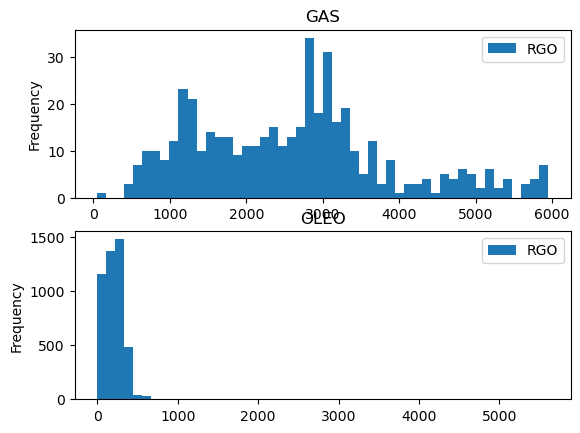

In [108]:
df_fluido[df_fluido['RGO']<6000].plot.hist(column='RGO', by='Fluido', bins=50)

array([<AxesSubplot:title={'center':'GAS'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'OLEO'}, ylabel='Frequency'>],
      dtype=object)

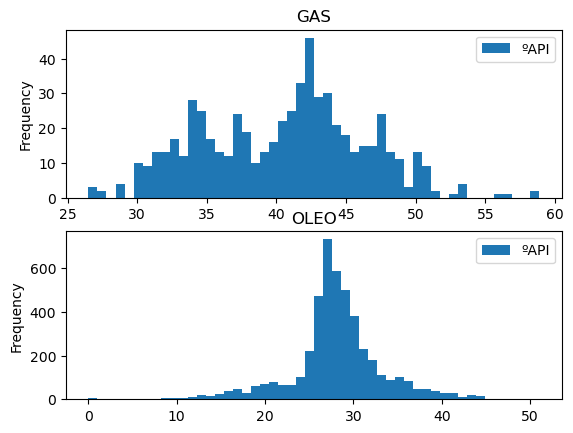

In [106]:
df_fluido.plot.hist(column='ºAPI', by='Fluido', bins=50)

In [109]:
def _codigo_fluido(x, api, rgo):
    rgo = float(rgo)
    api = float(api)
    if x=='OLEO':
        if api==0 and rgo==0:
            return 'oil'
        elif (api > 0) & (api < 15):
            return 'heavy_oil'
        elif (api > 15) & (api < 45):
            return 'oil'
        else:
            return 'condensate'
    elif x=='GAS':
        if rgo < 700:
            return 'condensate'
        elif (rgo >= 700) & (api < 40):
            return 'wet_gas'
        elif (rgo >= 700) & (api > 40):
            return 'dry_gas'

In [110]:
df_fluido['O&G_EARTH_FLUID']=df_fluido.apply(lambda x: _codigo_fluido(x['Fluido'], x['ºAPI'], x['RGO']), axis=1)

In [111]:
df_fluido.head()

,Poço,Bacia,Fluido,Topo (m),Tipo,Teor de H2S (ppmv),RGO,ºAPI,Contam. óleo morto (%m/m),Densid. do gás flash,O&G_EARTH_FLUID
0,1JAN 0001 AM,AMAZONAS,GAS,1738.7,Limpo,"<0,2",17999.22,55.71,NaN,0.73,dry_gas
1,1JAN 0001 AM,AMAZONAS,GAS,1743.4,Limpo,"<0,2",14722.26,56.83,NaN,0.72,dry_gas
2,1JAN 0001 AM,AMAZONAS,GAS,1851.0,Limpo,"<0,2",6976.47,58.88,NaN,0.77,dry_gas
3,1JAN 0001 AM,AMAZONAS,GAS,1851.0,Limpo,"<0,2",6906.61,58.88,NaN,0.77,dry_gas
4,1CES 0158 CE,CEARÁ,OLEO,3704.2,Descontaminado,"<0,2",82.34,32.57,11.37,0.74,oil


In [112]:
def _codigo_constituicao_fluido(x, topo, df_litoestratigrafia):
    topoFluido = float(topo)
    
    df_lito = df_litoestratigrafia[df_litoestratigrafia['Poço']==x]
    for j in list(df_lito.index):
        topoLitoestratigrafia = float(df_lito.loc[j]['Topo'])
        baseLitoestratigrafia = float(df_lito.loc[j]['Base'])
        if (topoFluido < baseLitoestratigrafia):
            return df_lito.loc[j]['LITHOSTRATIGRAPHIC_UNIT']

In [113]:
df_fluido['LITHOSTRATIGRAPHIC_UNIT']=df_fluido.apply(lambda x: _codigo_constituicao_fluido(x['Poço'], x['Topo (m)'], 
                                                                                           df_litoestratigrafia[df_litoestratigrafia['Poço'].isin(df_fluido['Poço'].unique())].dropna(subset='Base')), axis=1)

In [114]:
len(df_fluido[df_fluido['LITHOSTRATIGRAPHIC_UNIT'].isna()])/len(df_fluido)

0.4366467986925591

In [115]:
df_fluido[df_fluido['LITHOSTRATIGRAPHIC_UNIT'].isna()]

,Poço,Bacia,Fluido,Topo (m),Tipo,Teor de H2S (ppmv),RGO,ºAPI,Contam. óleo morto (%m/m),Densid. do gás flash,O&G_EARTH_FLUID,LITHOSTRATIGRAPHIC_UNIT
36,1PAS 0027 PA,PARÁ-MARANHÃO,OLEO,4930.5,Contaminado,"<0,2",630.86,42.39,10.01,0.79,oil,None
37,1PAS 0027 PA,PARÁ-MARANHÃO,OLEO,4930.5,Descontaminado,"<0,2",705.58,41.27,10.00,0.79,oil,None
38,1PAS 0027 PA,PARÁ-MARANHÃO,OLEO,4930.5,Contaminado,"<0,2",543.16,42.74,18.56,0.79,oil,None
39,1PAS 0027 PA,PARÁ-MARANHÃO,OLEO,4930.5,Descontaminado,"<0,2",676.13,40.37,18.60,0.79,oil,None
42,1RJS 0649 RJ,SANTOS,OLEO,2609.8,Contaminado,NaN,24.41,29.45,NaN,0.58,oil,None
...,...,...,...,...,...,...,...,...,...,...,...,...
5189,9SES 0188D SE,SERGIPE MAR,OLEO,5713.0,Descontaminado,"<0,2",168.91,35.10,15.44,0.89,oil,None
5190,9SES 0188D SE,SERGIPE MAR,OLEO,5722.2,Contaminado,1,142.92,35.02,14.62,0.89,oil,None
5191,9SES 0188D SE,SERGIPE MAR,OLEO,5722.2,Descontaminado,1,168.57,34.55,14.62,0.89,oil,None
5192,9SES 0188D SE,SERGIPE MAR,OLEO,5722.2,Contaminado,0.2,144.41,34.51,15.42,0.91,oil,None


In [116]:
df_fluido.to_excel('fluido_explora.xlsx')

### Gerar relações estruturas -> unidade litoestratigráfica e textura --> rocha

In [117]:
df_estrutura = _generate_table(basinList, 'estrutura')

In [118]:
len(df_estrutura)

6204

In [119]:
df_estrutura.head()

,Poço,Bacia,Campo,Tipo da Amostra,Prof. da Estrutura,Prof. Ajustada da Estrutura,Estrutura,Tipo Estrutura,Mnemônico
0,1AM 0013 AM,AMAZONAS,NaN,TEST,1121.09,1121.09,Maciça,Estrutura Física,ma
1,1AM 0013 AM,AMAZONAS,NaN,TEST,1122.93,1122.93,Estratificação Plano Paralela Pouco Definida,Estrutura Física,ew
2,1AM 0013 AM,AMAZONAS,NaN,TEST,1123.06,1123.06,Maciça,Estrutura Física,ma
3,1AM 0013 AM,AMAZONAS,NaN,TEST,1124.62,1124.62,Maciça,Estrutura Física,ma
4,1AM 0013 AM,AMAZONAS,NaN,TEST,1124.62,1124.62,Bivalve,Constituinte Arcabouço,bv


In [120]:
df_estrutura['Tipo Estrutura'].unique()

array(['Estrutura Física', 'Constituinte Arcabouço', 'Feição Diagenética',
       'Fóssil'], dtype=object)

In [121]:
df_estrutura[df_estrutura['Tipo Estrutura']=='Estrutura Física']['Estrutura'].unique()

array(['Maciça', 'Estratificação Plano Paralela Pouco Definida',
       'Estratificação Plano Paralela', 'Marca de Carga', 'Flaser',
       'Fratura', 'Estratificação Cruzada de Baixo Ângulo',
       'Estratificação Cruzada Tabular', 'Estratificação Cruzada',
       'Estrutura Lenticular (linsen)', 'Raiz',
       'Greta de Contração ou Ressecamento', 'Falha', 'Escavações',
       'Fluidização', 'Laminação Cavalgante', 'Discordância',
       'Gradação Inversa', 'Laminação Convoluta',
       'Estratificação Cruzada Acanalada Festonada', 'Escorregamento',
       'Estratificação Cruzada Sigmoidal', 'Base Erosional', 'Pilares',
       'Dique de Arenito', 'Imbricação de Seixos',
       'Estratificação Cruzada Tangencial', 'Gradação Normal',
       'Estrutura em Prato', 'Estrutura em Chama', 'Contato Gradacional',
       'Gradação Inversa/Normal', 'Gradação Normal/Inversa',
       'Tapete de Tração', 'Brechado', 'Hardground', 'Swaley', 'Geopetal',
       'Estratificação Cruzada Hummocky', 'Te

In [122]:
df_estrutura[df_estrutura['Tipo Estrutura']!='Estrutura Física']['Estrutura'].unique()

array(['Bivalve', 'Filmes de Argila', 'Nódulos de Anidrita',
       'Concreção Piritosa', 'Concreção Calcítica',
       'Fragmento de Rocha Sedimentar', 'Braquiópode', 'Intraclasto',
       'Oolito/ooidal', 'Pelóide', 'Fóssil Indiferenciado',
       'Espinho Equinóide', 'Crinóide', 'Estilolito',
       'Fragmento Lenhoso/Vegetais', 'Espinho Braquiópode',
       'Concreção Silicosa', 'Estromatolito', 'Bioclasto',
       'Fragmento de Carvão', 'Oncolito/oncoidal', 'Ostracode',
       'Vertebrado', 'Carbonoso', 'Caliche', 'Birdseye',
       'Concreção Dolomítica', 'Skolithos', 'Gastrópode', 'Zoophycos',
       'Palaeophycus', 'Ophiomorpha', 'Helminthopsis', 'Planolites'],
      dtype=object)

In [123]:
df_estrutura[df_estrutura['Prof. da Estrutura'].isna()]

,Poço,Bacia,Campo,Tipo da Amostra,Prof. da Estrutura,Prof. Ajustada da Estrutura,Estrutura,Tipo Estrutura,Mnemônico


In [124]:
with open('../estrutura_textura_porosidade/estrutura.json', 'r') as f:
    codigos_estrutura = json.load(f)

In [125]:
with open('../estrutura_textura_porosidade/estrutura.json', 'r') as f:
    codigos_textura = json.load(f)

In [126]:
for e in list(df_estrutura[df_estrutura['Tipo Estrutura']=='Estrutura Física']['Estrutura'].unique()):
    if e not in list(codigos_estrutura.values()):
        print(e)

Escavações
Escorregamento
Base Erosional
Brechado
Microestratificação Ondulada


In [127]:
for e in list(df_estrutura[df_estrutura['Tipo Estrutura']!='Estrutura Física']['Estrutura'].unique()):
    if e in list(codigos_textura.values()):
        print(e)

Filmes de Argila


In [128]:
def _codigo_estrutura(x, codigos_estrutura):
    if x=='Filmes de Argila':
        return 'TEFR_CD_TIPO_EST_FISICA_ROCHA_140'
    else:
        for key, name in codigos_estrutura.items():
            if x==name:
                return('TEFR_CD_TIPO_EST_FISICA_ROCHA_'+str(key).zfill(3))

In [129]:
df_estrutura['GEOLOGICAL_STRUCTURE']=df_estrutura['Estrutura'].apply(lambda x: _codigo_estrutura(x, codigos_estrutura))

In [130]:
df_estrutura.head()

,Poço,Bacia,Campo,Tipo da Amostra,Prof. da Estrutura,Prof. Ajustada da Estrutura,Estrutura,Tipo Estrutura,Mnemônico,GEOLOGICAL_STRUCTURE
0,1AM 0013 AM,AMAZONAS,NaN,TEST,1121.09,1121.09,Maciça,Estrutura Física,ma,TEFR_CD_TIPO_EST_FISICA_ROCHA_023
1,1AM 0013 AM,AMAZONAS,NaN,TEST,1122.93,1122.93,Estratificação Plano Paralela Pouco Definida,Estrutura Física,ew,TEFR_CD_TIPO_EST_FISICA_ROCHA_013
2,1AM 0013 AM,AMAZONAS,NaN,TEST,1123.06,1123.06,Maciça,Estrutura Física,ma,TEFR_CD_TIPO_EST_FISICA_ROCHA_023
3,1AM 0013 AM,AMAZONAS,NaN,TEST,1124.62,1124.62,Maciça,Estrutura Física,ma,TEFR_CD_TIPO_EST_FISICA_ROCHA_023
4,1AM 0013 AM,AMAZONAS,NaN,TEST,1124.62,1124.62,Bivalve,Constituinte Arcabouço,bv,None


In [131]:
def _codigo_estrutura_geologica(x, prof, df_litoestratigrafia):
    profEstrutura = float(prof)
    
    df_lito = df_litoestratigrafia[df_litoestratigrafia['Poço']==x]
    for j in list(df_lito.index):
        topoLitoestratigrafia = float(df_lito.loc[j]['Topo'])
        baseLitoestratigrafia = float(df_lito.loc[j]['Base'])
        if ((profEstrutura > topoLitoestratigrafia)&(profEstrutura < baseLitoestratigrafia)):
            return df_lito.loc[j]['LITHOSTRATIGRAPHIC_UNIT']

In [132]:
df_estrutura['LITHOSTRATIGRAPHIC_UNIT']=df_estrutura.apply(lambda x: _codigo_estrutura_geologica(x['Poço'], x['Prof. da Estrutura'], 
                                                                                                 df_litoestratigrafia[df_litoestratigrafia['Poço'].isin(df_estrutura['Poço'].unique())].dropna(subset='Base')), axis=1)

In [133]:
df_estrutura.head()

,Poço,Bacia,Campo,Tipo da Amostra,Prof. da Estrutura,Prof. Ajustada da Estrutura,Estrutura,Tipo Estrutura,Mnemônico,GEOLOGICAL_STRUCTURE,LITHOSTRATIGRAPHIC_UNIT
0,1AM 0013 AM,AMAZONAS,NaN,TEST,1121.09,1121.09,Maciça,Estrutura Física,ma,TEFR_CD_TIPO_EST_FISICA_ROCHA_023,formacao_187
1,1AM 0013 AM,AMAZONAS,NaN,TEST,1122.93,1122.93,Estratificação Plano Paralela Pouco Definida,Estrutura Física,ew,TEFR_CD_TIPO_EST_FISICA_ROCHA_013,formacao_187
2,1AM 0013 AM,AMAZONAS,NaN,TEST,1123.06,1123.06,Maciça,Estrutura Física,ma,TEFR_CD_TIPO_EST_FISICA_ROCHA_023,formacao_232
3,1AM 0013 AM,AMAZONAS,NaN,TEST,1124.62,1124.62,Maciça,Estrutura Física,ma,TEFR_CD_TIPO_EST_FISICA_ROCHA_023,formacao_232
4,1AM 0013 AM,AMAZONAS,NaN,TEST,1124.62,1124.62,Bivalve,Constituinte Arcabouço,bv,None,formacao_232


In [134]:
df_estrutura[df_estrutura['LITHOSTRATIGRAPHIC_UNIT'].isna()]

,Poço,Bacia,Campo,Tipo da Amostra,Prof. da Estrutura,Prof. Ajustada da Estrutura,Estrutura,Tipo Estrutura,Mnemônico,GEOLOGICAL_STRUCTURE,LITHOSTRATIGRAPHIC_UNIT
1149,1AMS 0001 MG,SÃO FRANCISCO,NaN,TEST,2304.22,2305.90,Estratificação Plano Paralela Pouco Definida,Estrutura Física,ew,TEFR_CD_TIPO_EST_FISICA_ROCHA_013,None
1150,1AMS 0001 MG,SÃO FRANCISCO,NaN,TEST,2304.72,2306.40,Estratificação Plano Paralela Pouco Definida,Estrutura Física,ew,TEFR_CD_TIPO_EST_FISICA_ROCHA_013,None
1151,1AMS 0001 MG,SÃO FRANCISCO,NaN,TEST,2305.05,2306.73,Estratificação Plano Paralela,Estrutura Física,pb,TEFR_CD_TIPO_EST_FISICA_ROCHA_012,None
1152,1AMS 0001 MG,SÃO FRANCISCO,NaN,TEST,2305.37,2307.05,Estratificação Plano Paralela Pouco Definida,Estrutura Física,ew,TEFR_CD_TIPO_EST_FISICA_ROCHA_013,None
1153,1AMS 0001 MG,SÃO FRANCISCO,NaN,TEST,2305.94,2307.62,Concreção Silicosa,Feição Diagenética,si,None,None
...,...,...,...,...,...,...,...,...,...,...,...
6186,9MRL 0231DARJS,CAMPOS MAR,MARLIM,TEST,4566.27,4569.48,Estratificação Plano Paralela,Estrutura Física,pb,TEFR_CD_TIPO_EST_FISICA_ROCHA_012,None
6187,9MRL 0231DARJS,CAMPOS MAR,MARLIM,TEST,4566.79,4570.00,Fratura,Estrutura Física,ft,TEFR_CD_TIPO_EST_FISICA_ROCHA_059,None
6188,9MRL 0231DARJS,CAMPOS MAR,MARLIM,TEST,4567.35,4570.56,Fratura,Estrutura Física,ft,TEFR_CD_TIPO_EST_FISICA_ROCHA_059,None
6189,9MRL 0231DARJS,CAMPOS MAR,MARLIM,TEST,4567.75,4570.96,Fratura,Estrutura Física,ft,TEFR_CD_TIPO_EST_FISICA_ROCHA_059,None


In [135]:
df_estrutura.to_excel('estrutura_explora.xlsx')

### Gerar relações litologia -> unidade litoestratigráfica

In [136]:
df_litologia = _generate_table(basinList, 'litologia')

In [137]:
len(df_litologia)

39030

In [138]:
df_litologia.head()

,Poço,Classificação,Subclassificação,Litologia,Mnemônico,Topo,Base
0,1AB 0001 BA,Sedimentar,Siliciclástica,ARENITO,ARN,4.4,47.0
1,1AB 0001 BA,Sedimentar,Siliciclástica,ARGILITO,AGT,47.0,54.0
2,1AB 0001 BA,Sedimentar,Siliciclástica,ARENITO,ARN,54.0,73.0
3,1AB 0001 BA,Sedimentar,Siliciclástica,FOLHELHO,FLH,73.0,81.0
4,1AB 0001 BA,Sedimentar,Siliciclástica,ARENITO,ARN,81.0,88.0


In [139]:
with open('../litologia/codigos_litologia.json', 'r') as f:
    codigos_litologia = json.load(f)

In [140]:
def _codigo_litologia(x, codigos_litologia):
    for key, name in codigos_litologia.items():
        if key==x:
            return(name)

In [141]:
df_litologia['EARTH_MATERIAL']=df_litologia['Litologia'].apply(lambda x: _codigo_litologia(x, codigos_litologia))

In [142]:
df_litologia.head()

,Poço,Classificação,Subclassificação,Litologia,Mnemônico,Topo,Base,EARTH_MATERIAL
0,1AB 0001 BA,Sedimentar,Siliciclástica,ARENITO,ARN,4.4,47.0,sandstone
1,1AB 0001 BA,Sedimentar,Siliciclástica,ARGILITO,AGT,47.0,54.0,argillite
2,1AB 0001 BA,Sedimentar,Siliciclástica,ARENITO,ARN,54.0,73.0,sandstone
3,1AB 0001 BA,Sedimentar,Siliciclástica,FOLHELHO,FLH,73.0,81.0,shale
4,1AB 0001 BA,Sedimentar,Siliciclástica,ARENITO,ARN,81.0,88.0,sandstone


In [143]:
def _codigo_constituicao_litologica(x, topo, base, df_litoestratigrafia):
    topoLitologia = float(topo)
    baseLitologia = float(base)
    
    df_lito = df_litoestratigrafia[df_litoestratigrafia['Poço']==x]
    for j in list(df_lito.index):
        topoLitoestratigrafia = float(df_lito.loc[j]['Topo'])
        baseLitoestratigrafia = float(df_lito.loc[j]['Base'])
        if ((topoLitologia >= topoLitoestratigrafia)&(baseLitologia <= baseLitoestratigrafia)):
            print(x, topoLitologia, df_lito.loc[j]['LITHOSTRATIGRAPHIC_UNIT'])
            return df_lito.loc[j]['LITHOSTRATIGRAPHIC_UNIT']

In [144]:
df_litologia['LITHOSTRATIGRAPHIC_UNIT']=df_litologia.apply(lambda x: _codigo_constituicao_litologica(x['Poço'], x['Topo'], x['Base'], df_litoestratigrafia.dropna(subset='Base')), axis=1)

1AB  0001  BA 4.4 grupo_024
1AB  0001  BA 47.0 grupo_024
1AB  0001  BA 54.0 grupo_024
1AB  0001  BA 73.0 grupo_024
1AB  0001  BA 81.0 grupo_024
1AB  0001  BA 88.0 grupo_024
1AB  0001  BA 91.0 grupo_024
1AB  0001  BA 115.0 grupo_024
1AB  0001  BA 117.0 grupo_024
1AB  0001  BA 210.0 grupo_024
1AB  0001  BA 225.0 grupo_024
1AB  0001  BA 233.0 grupo_024
1AB  0001  BA 237.0 grupo_024
1AB  0001  BA 258.0 grupo_024
1AB  0001  BA 260.0 grupo_024
1AB  0001  BA 384.0 grupo_024
1AB  0001  BA 387.0 grupo_024
1AB  0001  BA 440.0 grupo_024
1AB  0001  BA 450.0 grupo_024
1AB  0001  BA 456.0 grupo_024
1AB  0001  BA 462.0 grupo_024
1AB  0001  BA 497.0 grupo_024
1AB  0001  BA 505.0 grupo_024
1AB  0001  BA 546.0 grupo_024
1AB  0001  BA 566.0 grupo_024
1AB  0001  BA 571.0 grupo_024
1AB  0001  BA 601.0 grupo_032
1AB  0001  BA 603.0 grupo_032
1AB  0001  BA 607.0 grupo_032
1AB  0001  BA 609.0 grupo_032
1AB  0001  BA 616.0 grupo_032
1AB  0001  BA 618.0 grupo_032
1AB  0001  BA 625.0 grupo_032
1AB  0001  BA 634.

In [145]:
df_litologia.drop(columns=['Classificação', 'Subclassificação', 'Mnemônico', 'Topo', 'Base'], inplace=True)

In [146]:
df_litologia.reset_index(drop=True, inplace=True)

In [147]:
df_litologia.head()

,Poço,Litologia,EARTH_MATERIAL,LITHOSTRATIGRAPHIC_UNIT
0,1AB 0001 BA,ARENITO,sandstone,grupo_024
1,1AB 0001 BA,ARGILITO,argillite,grupo_024
2,1AB 0001 BA,ARENITO,sandstone,grupo_024
3,1AB 0001 BA,FOLHELHO,shale,grupo_024
4,1AB 0001 BA,ARENITO,sandstone,grupo_024


In [148]:
len(df_litologia.drop_duplicates())

1062

In [149]:
df_litologia.drop_duplicates().to_excel('litologia_explora_TUCANO.xlsx')